# Imports

In [2]:
import pandas as pd
import seaborn as sns
import re
import string
from nltk.tokenize import word_tokenize
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE, Laplace

---

# Preprocessing

In [ ]:
def conv_uchar_to_space(string):
    return "".join([i if ord(i) < 128 else " " for i in string])

In [103]:
def preproc(filename):
    df = pd.read_csv(filename, delimiter="\t")
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    df = df[df["category"] != "not-Tamil"]
    df["text"] = df["text"].apply(conv_uchar_to_space)
    df["text"] = df["text"].apply(str.lower)
    df["text"] = df["text"].apply(lambda x: re.sub(r"\d+", "", x))
    df["text"] = df["text"].apply(contractions.fix)
    df["text"] = df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
    df["text"].to_csv(f"{filename}_cleaned.csv", index=False)
    df["text"] = df["text"].apply(lambda x: word_tokenize(x))
    corpus = df["text"].tolist()
    return corpus

In [38]:
df = pd.read_csv("./tamil_train.tsv", delimiter="\t")

In [4]:
df.head()

,text,category
0,Trailer late ah parthavanga like podunga,Positive
1,Move pathutu vanthu trailer pakurvnga yaru,Positive
2,Puthupetai dhanush ah yarellam pathinga,Positive
3,"Dhanush oda character ,puthu sa erukay , mass ta",Positive
4,vera level ippa pesungada mokka nu thalaivaaaaaa,Positive


In [5]:
df.shape

(11335, 2)

In [39]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Distribution

<Axes: xlabel='category', ylabel='Count'>

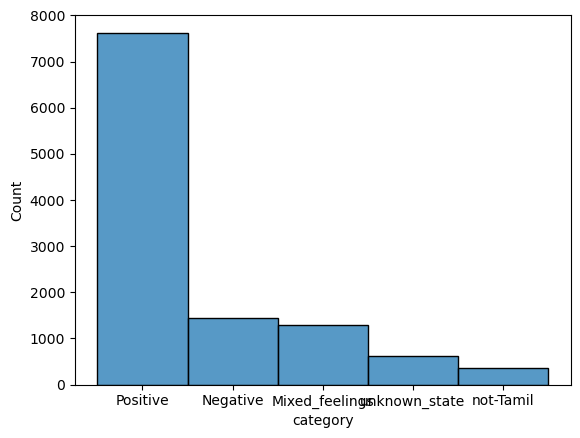

In [13]:
sns.histplot(data=df, x="category")

## Removing non-tamil sentences

In [17]:
(df["category"] == "not-Tamil").value_counts()

False    10967
True       368
Name: category, dtype: int64

In [40]:
df = df[df["category"] != "not-Tamil"]

In [41]:
df.shape

(10967, 2)

<Axes: xlabel='category', ylabel='Count'>

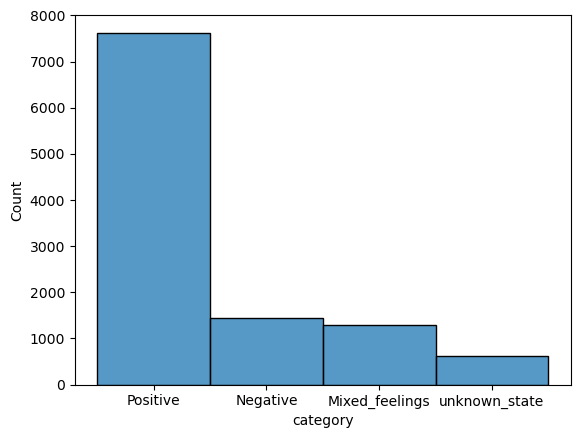

In [42]:
sns.histplot(data=df, x="category")

## Remove non ASCII characters

In [54]:
df["text"].apply(conv_uchar_to_space)

0                 trailer late ah parthavanga like podunga
1               move pathutu vanthu trailer pakurvnga yaru
2                 puthupetai dhanush  ah yarellam pathinga
3         dhanush oda character ,puthu sa erukay , mass ta
4         vera level ippa pesungada mokka nu thalaivaaaaaa
                               ...                        
11330           yuvan shankar raja anna fan's like here...
11331      a masterpiece best revenge film i ve ever scene
11332                enna pa thala ya kamiya than katringa
11333                              r a a s h i k h a n n a
11334    trailer la nalla thaan iruku ana sound thaan k...
Name: text, Length: 10967, dtype: object

In [55]:
df["text"] = df["text"].apply(conv_uchar_to_space)

In [46]:
df.head()

,text,category
0,Trailer late ah parthavanga like podunga,Positive
1,Move pathutu vanthu trailer pakurvnga yaru,Positive
2,Puthupetai dhanush ah yarellam pathinga,Positive
3,"Dhanush oda character ,puthu sa erukay , mass ta",Positive
4,vera level ippa pesungada mokka nu thalaivaaaaaa,Positive


## Convert to lowercase

In [56]:
df["text"].apply(str.lower)

0                 trailer late ah parthavanga like podunga
1               move pathutu vanthu trailer pakurvnga yaru
2                 puthupetai dhanush  ah yarellam pathinga
3         dhanush oda character ,puthu sa erukay , mass ta
4         vera level ippa pesungada mokka nu thalaivaaaaaa
                               ...                        
11330           yuvan shankar raja anna fan's like here...
11331      a masterpiece best revenge film i ve ever scene
11332                enna pa thala ya kamiya than katringa
11333                              r a a s h i k h a n n a
11334    trailer la nalla thaan iruku ana sound thaan k...
Name: text, Length: 10967, dtype: object

In [57]:
df["text"] = df["text"].apply(str.lower)

In [49]:
df.head()

,text,category
0,trailer late ah parthavanga like podunga,Positive
1,move pathutu vanthu trailer pakurvnga yaru,Positive
2,puthupetai dhanush ah yarellam pathinga,Positive
3,"dhanush oda character ,puthu sa erukay , mass ta",Positive
4,vera level ippa pesungada mokka nu thalaivaaaaaa,Positive


# Removing Numbers

In [58]:
df["text"].apply(lambda x: re.sub(r"\d+", "", x))

0                 trailer late ah parthavanga like podunga
1               move pathutu vanthu trailer pakurvnga yaru
2                 puthupetai dhanush  ah yarellam pathinga
3         dhanush oda character ,puthu sa erukay , mass ta
4         vera level ippa pesungada mokka nu thalaivaaaaaa
                               ...                        
11330           yuvan shankar raja anna fan's like here...
11331      a masterpiece best revenge film i ve ever scene
11332                enna pa thala ya kamiya than katringa
11333                              r a a s h i k h a n n a
11334    trailer la nalla thaan iruku ana sound thaan k...
Name: text, Length: 10967, dtype: object

In [59]:
df["text"] = df["text"].apply(lambda x: re.sub(r"\d+", "", x))

## Expand Contractions

In [61]:
df["text"].apply(contractions.fix)

0                 trailer late ah parthavanga like podunga
1               move pathutu vanthu trailer pakurvnga yaru
2                 puthupetai dhanush  ah yarellam pathinga
3         dhanush oda character ,puthu sa erukay , mass ta
4         vera level ippa pesungada mokka nu thalaivaaaaaa
                               ...                        
11330           yuvan shankar raja anna fan's like here...
11331      a masterpiece best revenge film i ve ever scene
11332                enna pa thala ya kamiya than katringa
11333                              r a a s h i k h a n n a
11334    trailer la nalla thaan iruku ana sound thaan k...
Name: text, Length: 10967, dtype: object

In [62]:
df["text"] = df["text"].apply(contractions.fix)

# Remove Punctuations

In [63]:
df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

0                 trailer late ah parthavanga like podunga
1               move pathutu vanthu trailer pakurvnga yaru
2                 puthupetai dhanush  ah yarellam pathinga
3           dhanush oda character puthu sa erukay  mass ta
4         vera level ippa pesungada mokka nu thalaivaaaaaa
                               ...                        
11330               yuvan shankar raja anna fans like here
11331      a masterpiece best revenge film i ve ever scene
11332                enna pa thala ya kamiya than katringa
11333                              r a a s h i k h a n n a
11334    trailer la nalla thaan iruku ana sound thaan k...
Name: text, Length: 10967, dtype: object

In [64]:
df["text"] = df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

In [67]:
df["text"].to_csv("cleaned.csv", index=False)

# Tokenization

In [70]:
df["text"].apply(lambda x: word_tokenize(x))

0          [trailer, late, ah, parthavanga, like, podunga]
1        [move, pathutu, vanthu, trailer, pakurvnga, yaru]
2            [puthupetai, dhanush, ah, yarellam, pathinga]
3        [dhanush, oda, character, puthu, sa, erukay, m...
4        [vera, level, ippa, pesungada, mokka, nu, thal...
                               ...                        
11330       [yuvan, shankar, raja, anna, fans, like, here]
11331    [a, masterpiece, best, revenge, film, i, ve, e...
11332        [enna, pa, thala, ya, kamiya, than, katringa]
11333                 [r, a, a, s, h, i, k, h, a, n, n, a]
11334    [trailer, la, nalla, thaan, iruku, ana, sound,...
Name: text, Length: 10967, dtype: object

In [71]:
df["text"] = df["text"].apply(lambda x: word_tokenize(x))

In [72]:
df.head()

,text,category
0,"[trailer, late, ah, parthavanga, like, podunga]",Positive
1,"[move, pathutu, vanthu, trailer, pakurvnga, yaru]",Positive
2,"[puthupetai, dhanush, ah, yarellam, pathinga]",Positive
3,"[dhanush, oda, character, puthu, sa, erukay, m...",Positive
4,"[vera, level, ippa, pesungada, mokka, nu, thal...",Positive


In [74]:
corpus = df["text"].tolist()

---
# N-Gram

In [77]:
train, vocab = padded_everygram_pipeline(2, corpus)

In [80]:
for _ in range(10):
    print(list(next(train)))

[('<s>',), ('<s>', 'when'), ('when',), ('when', 'pandey'), ('pandey',), ('pandey', 'gets'), ('gets',), ('gets', 'up'), ('up',), ('up', 'vandumurugan'), ('vandumurugan',), ('vandumurugan', 'i'), ('i',), ('i', 'am'), ('am',), ('am', 'speaking'), ('speaking',), ('speaking', 'no'), ('no',), ('no', 'cross'), ('cross',), ('cross', 'speaking'), ('speaking',), ('speaking', 'sittt'), ('sittt',), ('sittt', 'downnn'), ('downnn',), ('downnn', '</s>'), ('</s>',)]
[('<s>',), ('<s>', 'remake'), ('remake',), ('remake', 'of'), ('of',), ('of', 'malayalam'), ('malayalam',), ('malayalam', 'mohanlal'), ('mohanlal',), ('mohanlal', 'movie'), ('movie',), ('movie', 'devadoodhan'), ('devadoodhan',), ('devadoodhan', '</s>'), ('</s>',)]
[('<s>',), ('<s>', 'tharamaana'), ('tharamaana',), ('tharamaana', 'sirappaana'), ('sirappaana',), ('sirappaana', 'sambavam'), ('sambavam',), ('sambavam', 'inimeal'), ('inimeal',), ('inimeal', 'ta'), ('ta',), ('ta', 'paaka'), ('paaka',), ('paaka', 'pora'), ('pora',), ('pora', '</s>

In [82]:
lm = MLE(2)

In [83]:
len(lm.vocab)

0

In [84]:
lm.fit(train, vocab)

In [85]:
print(lm.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 18404 items>


In [86]:
len(lm.vocab)

18404

In [87]:
lm.vocab.lookup(corpus[0])

('trailer', 'late', 'ah', 'parthavanga', 'like', 'podunga')

In [88]:
lm.vocab.lookup(["aliens", "from", "Mars"])

('aliens', 'from', '<UNK>')

In [89]:
print(lm.counts)

<NgramCounter with 2 ngram orders and 215279 ngrams>


In [91]:
lm.counts['thala']

1890

In [99]:
lm.generate(5)

['shooting', 'etuthaanga', '</s>', 'padathula', 'sivakarthikeyan']

In [104]:
test = preproc("./tamil_dev.tsv")

In [106]:
test_bigram , _ = padded_everygram_pipeline(2, test)

In [110]:
test_bigram = list(test_bigram)

In [112]:
test_bigram = [list(x) for x in test_bigram]

In [139]:
lm.perplexity("trailer")

1791.25794684349

In [143]:
lm.logscore("thala", ["mass"])

-4.366178869316403

In [142]:
lm.logscore("trailer", ["mass"])

-5.08746284125034